In [94]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm

import operator

In [95]:
dados = pd.read_csv("dados.csv")

In [96]:
dados

,Gravidezes,Glicose,PressãoSanguínea,EspessuraPele,Insulina,IMC,FuncaoHereditaria,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [97]:
# Create Nutritional status column 

status_nutricional = pd.Series([],dtype=pd.StringDtype())


In [98]:
# Nutritional status based on IMC

for i in range(len(dados)): 
    if dados['IMC'][i] == 0.0: 
        status_nutricional[i]="NA"
    
    elif dados['IMC'][i] < 18.5: 
        status_nutricional[i]="Abaixo do Peso"
        
    elif dados['IMC'][i] < 25: 
        status_nutricional[i]="Peso Normal"
  
    elif dados['IMC'][i] >= 25 and dados['IMC'][i] < 30: 
        status_nutricional[i]="Sobrepeso"
  
    elif dados['IMC'][i] >= 30 and dados['IMC'][i] < 35: 
        status_nutricional[i]="Obesidade Grau 1"
        
    elif dados['IMC'][i] >= 35 and dados['IMC'][i] < 40: 
        status_nutricional[i]="Obesidade Grau 2"
        
    elif dados['IMC'][i] >= 40:
        status_nutricional[i]="Obesidade Mórbida"
        
    else: 
        status_nutricional[i]= dados['IMC'][i] 

In [99]:
# Insert new column - Nutritional Status
dados.insert(6, "StatusNutricional", status_nutricional)

In [100]:
status_glicose = pd.Series([],dtype=pd.StringDtype())

In [101]:
# Interpretation of OGTT (Glucose) - using OGTT levels recommended by DIABETES UK (2019)

for i in range(len(dados)): 
    if dados['Glicose'][i] == 0.0: 
        status_glicose [i]="NA"
    
    elif dados['Glicose'][i] <= 140: 
        status_glicose [i]="Normal"
    
    elif dados['Glicose'][i] > 140 & dados['Glicose'][i] <= 199: 
        status_glicose [i]="Pré-Diabetes"
        
    elif dados['Glicose'][i] > 199: 
        status_glicose [i]="Diabetes"
        
    else: 
        status_glicose [i]= dados['Glicose'][i] 

In [102]:
# Insert new column - Glucose Result
dados.insert(2, "StatusGlicose", status_glicose)

In [103]:
dados

,Gravidezes,Glicose,StatusGlicose,PressãoSanguínea,EspessuraPele,Insulina,IMC,StatusNutricional,FuncaoHereditaria,Idade,Resultado
0,6,148,Pré-Diabetes,72,35,0,33.6,Obesidade Grau 1,0.627,50,1
1,1,85,Normal,66,29,0,26.6,Sobrepeso,0.351,31,0
2,8,183,Pré-Diabetes,64,0,0,23.3,Peso Normal,0.672,32,1
3,1,89,Normal,66,23,94,28.1,Sobrepeso,0.167,21,0
4,0,137,Normal,40,35,168,43.1,Obesidade Mórbida,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,Normal,76,48,180,32.9,Obesidade Grau 1,0.171,63,0
764,2,122,Normal,70,27,0,36.8,Obesidade Grau 2,0.340,27,0
765,5,121,Normal,72,23,112,26.2,Sobrepeso,0.245,30,0
766,1,126,Normal,60,0,0,30.1,Obesidade Grau 1,0.349,47,1


In [104]:
dados['StatusNutricional'].value_counts().to_frame()

,StatusNutricional
Obesidade Grau 1,224
Sobrepeso,179
Obesidade Grau 2,150
Peso Normal,102
Obesidade Mórbida,98
NA,11
Abaixo do Peso,4


In [105]:
dados['StatusGlicose'].value_counts().to_frame()

,StatusGlicose
Normal,571
Pré-Diabetes,192
NA,5


In [106]:
dados['Gravidezes'].value_counts().to_frame()

,Gravidezes
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38
9,28


In [107]:
dados['Glicose'].value_counts().to_frame()

,Glicose
99,17
100,17
111,14
129,14
125,14
...,...
191,1
177,1
44,1
62,1


In [108]:
dados['PressãoSanguínea'].value_counts().to_frame()

,PressãoSanguínea
70,57
74,52
78,45
68,45
72,44
64,43
80,40
76,39
60,37
0,35


In [109]:
dados['EspessuraPele'].value_counts().to_frame()

,EspessuraPele
0,227
32,31
30,27
27,23
23,22
33,20
28,20
18,20
31,19
19,18


In [110]:
dados['Insulina'].value_counts().to_frame()

,Insulina
0,374
105,11
130,9
140,9
120,8
...,...
73,1
171,1
255,1
52,1


In [111]:
dados['IMC'].value_counts().to_frame()

,IMC
32.0,13
31.6,12
31.2,12
0.0,11
32.4,10
...,...
36.7,1
41.8,1
42.6,1
42.8,1


In [112]:
dados['Idade'].value_counts().to_frame()

,Idade
22,72
21,63
25,48
24,46
23,38
28,35
26,33
27,32
29,29
31,24


In [113]:
Idade_media = dados['Idade'].mean()
Idade_mediana = dados['Idade'].median()
Idade_moda = dados['Idade'].mode()
Idade_variancia = dados['Idade'].var()
Idade_desvioPadrao = dados['Idade'].std()

print("Idade -> Média          ", Idade_media)
print("         Mediana        ", Idade_mediana)
print("         Moda           ", Idade_moda[0])
print("         Variância      ", Idade_variancia)
print("         Desvio Padrão  ", Idade_desvioPadrao)

Idade -> Média           33.240885416666664
         Mediana         29.0
         Moda            22
         Variância       138.30304589037365
         Desvio Padrão   11.76023154067868


In [114]:
Gravidezes_media = dados['Gravidezes'].mean()
Gravidezes_mediana = dados['Gravidezes'].median()
Gravidezes_moda = dados['Gravidezes'].mode()
Gravidezes_variancia = dados['Gravidezes'].var()
Gravidezes_desvioPadrao = dados['Gravidezes'].std()

print("Gravidezes -> Média          ", Gravidezes_media)
print("              Mediana        ", Gravidezes_mediana)
print("              Moda           ", Gravidezes_moda[0])
print("              Variância      ", Gravidezes_variancia)
print("              Desvio Padrão  ", Gravidezes_desvioPadrao)

Gravidezes -> Média           3.8450520833333335
              Mediana         3.0
              Moda            1
              Variância       11.35405632062142
              Desvio Padrão   3.3695780626988623


In [115]:
Glicose_media = dados['Glicose'].mean()
Glicose_mediana = dados['Glicose'].median()
Glicose_moda = dados['Glicose'].mode()
Glicose_variancia = dados['Glicose'].var()
Glicose_desvioPadrao = dados['Glicose'].std()

print("Glicose -> Média          ", Glicose_media)
print("           Mediana        ", Glicose_mediana)
print("           Moda           ", Glicose_moda[0])
print("           Variância      ", Glicose_variancia)
print("           Desvio Padrão  ", Glicose_desvioPadrao)

Glicose -> Média           120.89453125
           Mediana         117.0
           Moda            99
           Variância       1022.2483142519557
           Desvio Padrão   31.97261819513622


In [116]:
Pressao_media = dados['PressãoSanguínea'].mean()
Pressao_mediana = dados['PressãoSanguínea'].median()
Pressao_moda = dados['PressãoSanguínea'].mode()
Pressao_variancia = dados['PressãoSanguínea'].var()
Pressao_desvioPadrao = dados['PressãoSanguínea'].std()

print("Pressão Sanguínea -> Média          ", Pressao_media)
print("                     Mediana        ", Pressao_mediana)
print("                     Moda           ", Pressao_moda[0])
print("                     Variância      ", Pressao_variancia)
print("                     Desvio Padrão  ", Pressao_desvioPadrao)

Pressão Sanguínea -> Média           69.10546875
                     Mediana         72.0
                     Moda            70
                     Variância       374.6472712271838
                     Desvio Padrão   19.355807170644777


In [117]:
EspessuraPele_media = dados['EspessuraPele'].mean()
EspessuraPele_mediana = dados['EspessuraPele'].median()
EspessuraPele_moda = dados['EspessuraPele'].mode()
EspessuraPele_variancia = dados['EspessuraPele'].var()
EspessuraPele_desvioPadrao = dados['EspessuraPele'].std()

print("Espessura da Pele -> Média          ", EspessuraPele_media)
print("                     Mediana        ", EspessuraPele_mediana)
print("                     Moda           ", EspessuraPele_moda[0])
print("                     Variância      ", EspessuraPele_variancia)
print("                     Desvio Padrão  ", EspessuraPele_desvioPadrao)

Espessura da Pele -> Média           20.536458333333332
                     Mediana         23.0
                     Moda            0
                     Variância       254.47324532811953
                     Desvio Padrão   15.952217567727677


In [118]:
Insulina_media = dados['Insulina'].mean()
Insulina_mediana = dados['Insulina'].median()
Insulina_moda = dados['Insulina'].mode()
Insulina_variancia = dados['Insulina'].var()
Insulina_desvioPadrao = dados['Insulina'].std()

print("Insulina -> Média          ", Insulina_media)
print("            Mediana        ", Insulina_mediana)
print("            Moda           ", Insulina_moda[0])
print("            Variância      ", Insulina_variancia)
print("            Desvio Padrão  ", Insulina_desvioPadrao)

Insulina -> Média           79.79947916666667
            Mediana         30.5
            Moda            0
            Variância       13281.180077955281
            Desvio Padrão   115.24400235133837


In [119]:
IMC_media = dados['IMC'].mean()
IMC_mediana = dados['IMC'].median()
IMC_moda = dados['IMC'].mode()
IMC_variancia = dados['IMC'].var()
IMC_desvioPadrao = dados['IMC'].std()

print("IMC -> Média          ", IMC_media)
print("       Mediana        ", IMC_mediana)
print("       Moda           ", IMC_moda[0])
print("       Variância      ", IMC_variancia)
print("       Desvio Padrão  ", IMC_desvioPadrao)

IMC -> Média           31.992578124999977
       Mediana         32.0
       Moda            32.0
       Variância       62.15998395738257
       Desvio Padrão   7.8841603203754405


In [120]:
FuncaoHereditaria_media = dados['FuncaoHereditaria'].mean()
FuncaoHereditaria_mediana = dados['FuncaoHereditaria'].median()
FuncaoHereditaria_moda = dados['FuncaoHereditaria'].mode()
FuncaoHereditaria_variancia = dados['FuncaoHereditaria'].var()
FuncaoHereditaria_desvioPadrao = dados['FuncaoHereditaria'].std()

print("FuncaoHereditaria -> Média          ", FuncaoHereditaria_media)
print("                     Mediana        ", FuncaoHereditaria_mediana)
print("                     Moda           ", FuncaoHereditaria_moda[0])
print("                     Variância      ", FuncaoHereditaria_variancia)
print("                     Desvio Padrão  ", FuncaoHereditaria_desvioPadrao)

FuncaoHereditaria -> Média           0.4718763020833327
                     Mediana         0.3725
                     Moda            0.254
                     Variância       0.10977863787313938
                     Desvio Padrão   0.33132859501277484


In [121]:
tDados = dados.loc[(dados['IMC'] != 0) & (dados['Insulina'] != 0) & (dados['EspessuraPele'] != 0) & (dados['Glicose'] != 0)]

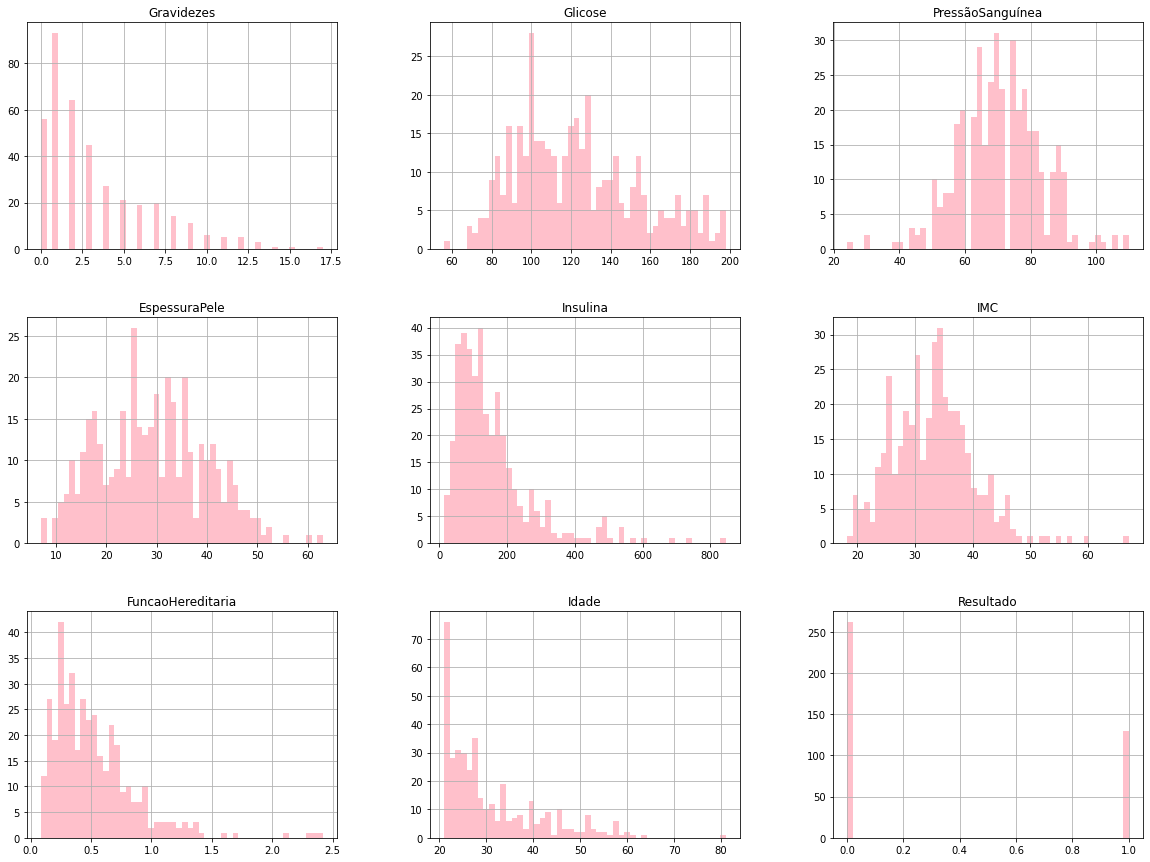

In [123]:
tDados.hist(bins=50, figsize=(20, 15), color='pink')
plt.show()

Gravidezes              AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glicose              AxesSubplot(0.398529,0.657941;0.227941x0.222059)
PressãoSanguínea     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
EspessuraPele           AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulina             AxesSubplot(0.398529,0.391471;0.227941x0.222059)
IMC                  AxesSubplot(0.672059,0.391471;0.227941x0.222059)
FuncaoHereditaria          AxesSubplot(0.125,0.125;0.227941x0.222059)
Idade                   AxesSubplot(0.398529,0.125;0.227941x0.222059)
Resultado               AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

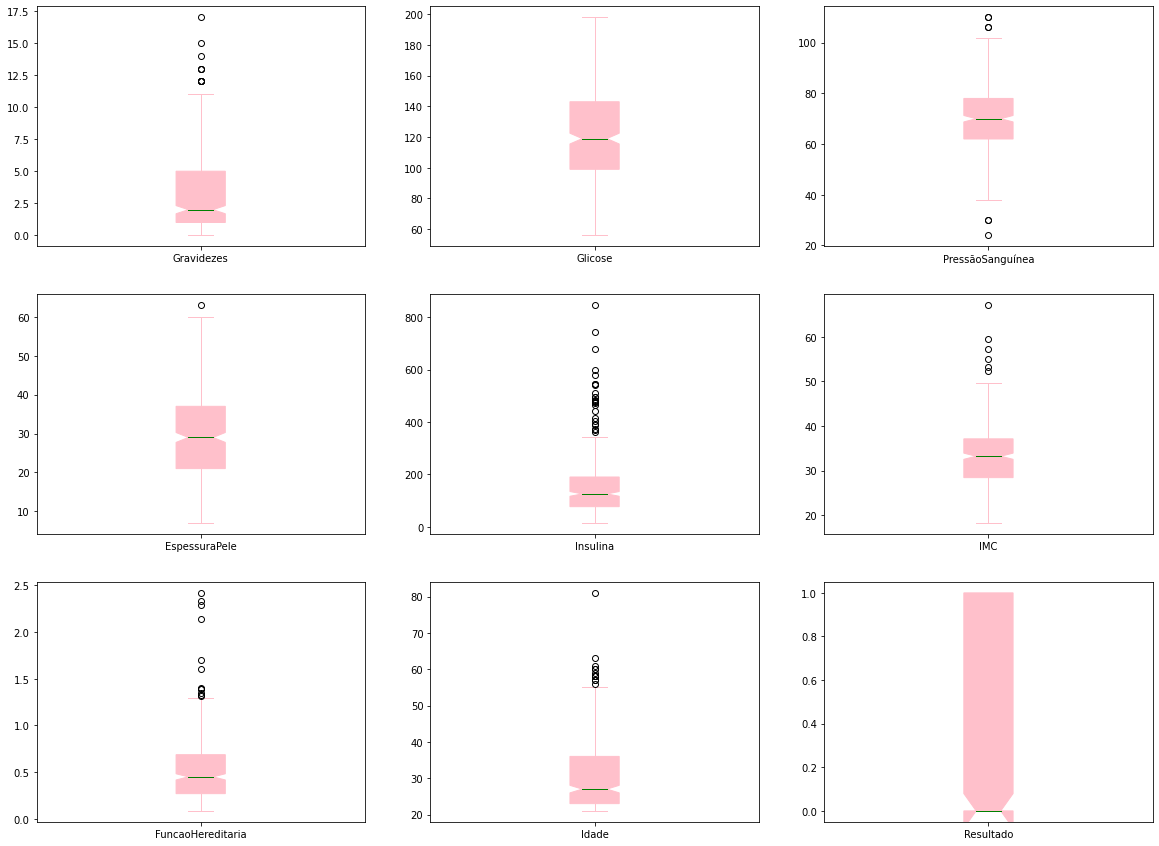

In [135]:
#Box and Whisker plot to visualize the distribution of all atributes
tDados.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15), notch=True, vert=True, 
                            patch_artist=True, color='pink', medianprops=dict(color='g'))

In [144]:
x = dados['StatusNutricional']
y = dados['Insulina']

Text(0.5, 1.0, 'Insulina X Status Nutricional')

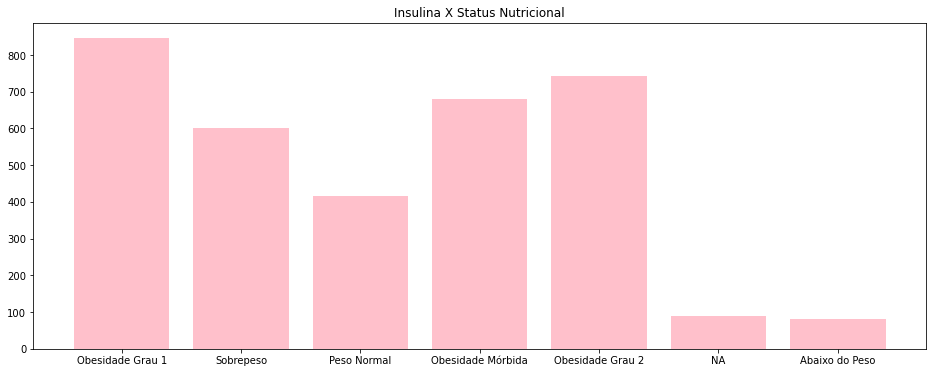

In [145]:
plt.figure(figsize=(16,6))
plt.bar(x,y, color='pink')
plt.title('Insulina X Status Nutricional')

In [128]:
tb = dados['StatusNutricional'].value_counts()

In [129]:
(tb/tb.sum())*100

Obesidade Grau 1     29.166667
Sobrepeso            23.307292
Obesidade Grau 2     19.531250
Peso Normal          13.281250
Obesidade Mórbida    12.760417
NA                    1.432292
Abaixo do Peso        0.520833
Name: StatusNutricional, dtype: float64

In [139]:
pd.crosstab(index=dados['StatusGlicose'], columns=dados['StatusNutricional'])

StatusNutricional,Abaixo do Peso,NA,Obesidade Grau 1,Obesidade Grau 2,Obesidade Mórbida,Peso Normal,Sobrepeso
StatusGlicose,,,,,,,
NA,0,0,1,1,1,1,1
Normal,4,11,156,109,54,91,146
Pré-Diabetes,0,0,67,40,43,10,32
